In [1]:
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
from model_init import model_list
from train import train_models
from feature_scaler import stan_scaler, mm_scaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [3]:
# data (as pandas dataframes) 
X = covertype.data.features 
Y = covertype.data.targets 

### Creating Dataframe

In [4]:
Y['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scaler = StandardScaler()
for feature in X:
    if ((X[feature] < 0).any() or (X[feature] > 1).any()):
            X[feature] = scaler.fit_transform(X[[feature]])
            X[feature] = scaler.fit_transform(X[[feature]])

### Splitting Positive-Negative Labels

In [28]:
Y['Cover_Type'] = Y['Cover_Type'].isin([2]).astype(int)

In [30]:
df = pd.concat([X, Y], axis = 1)
df = df.sample(n = 10000, random_state = 42)

### Finding correlated features with correlation matrix

In [31]:
corr_mtx = df.corr()
print(f'Most Positively Correlated Features: {corr_mtx['Cover_Type'][corr_mtx['Cover_Type'] > 0.10].index.tolist()}')
print(f'Most Negatively Correlated Features: {corr_mtx['Cover_Type'][corr_mtx['Cover_Type'] < -0.10].index.tolist()}')

Most Positively Correlated Features: ['Cover_Type']
Most Negatively Correlated Features: []


### Splitting Dataframe into Features and Target Data

In [10]:
X = df.drop('Cover_Type', axis = 1)
Y = df['Cover_Type']

### Loading Models

In [11]:
lr_models, svm_models, rf_models = model_list()

### Training Logistic Regression Models with test_size = 0.8

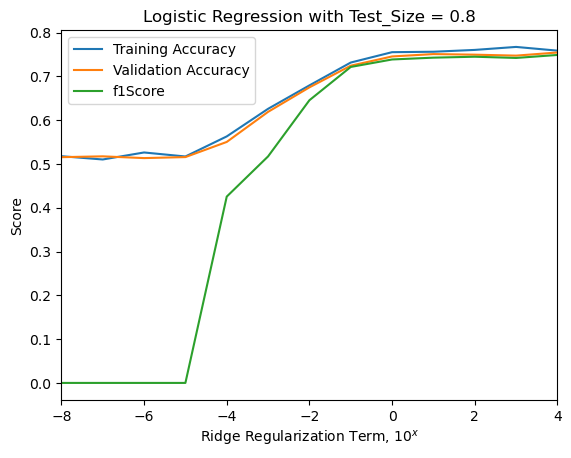

In [12]:
train_acc, val_acc, f1_scores = train_models(X, Y, lr_models, 0.8)
plt.title("Logistic Regression with Test_Size = 0.8")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()

### Training Logistic Regression Models with test_size = 0.5

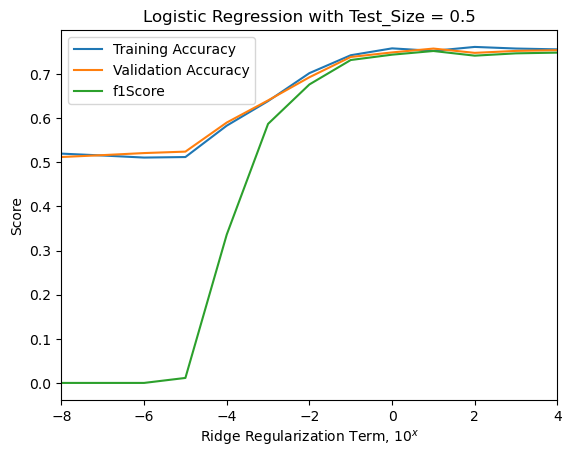

In [13]:
train_acc, val_acc, f1_scores = train_models(X, Y, lr_models, 0.5)
plt.title("Logistic Regression with Test_Size = 0.5")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()

### Training Logistic Regression Models with test_size = 0.2

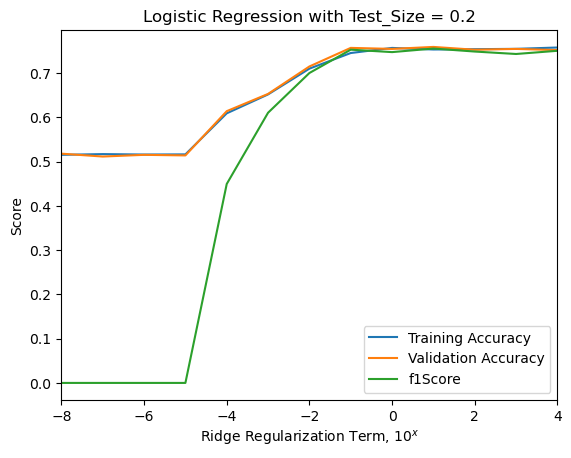

In [14]:
train_acc, val_acc, f1_scores = train_models(X, Y, lr_models, 0.2)
plt.title("Logistic Regression with Test_Size = 0.2")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()

### Training SVM Models with test_size = 0.8

In [15]:
svm_labels = ['Linear', 'Poly2', 'Poly3', 'RBF-.001', 'RBF-.05', 'RBF-1']

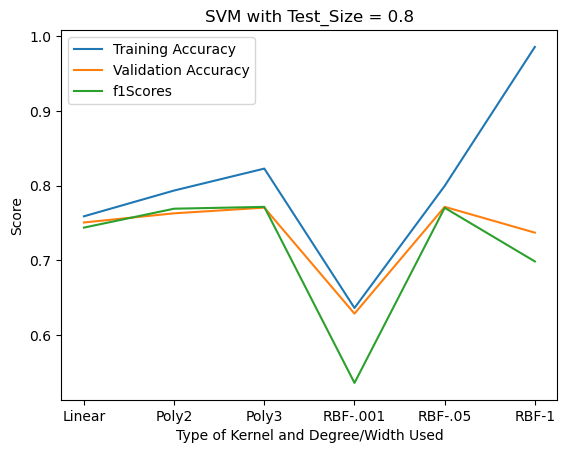

In [16]:
train_acc, val_acc, f1_scores = train_models(X, Y, svm_models, 0.8)
plt.title("SVM with Test_Size = 0.8")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()

### Training SVM Models with test_size = 0.5

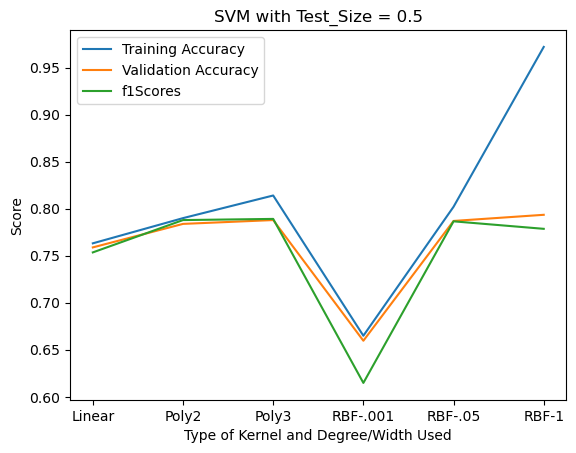

In [17]:
train_acc, val_acc, f1_scores = train_models(X, Y, svm_models, 0.5)
plt.title("SVM with Test_Size = 0.5")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()

### Training SVM Models with test_size = 0.2

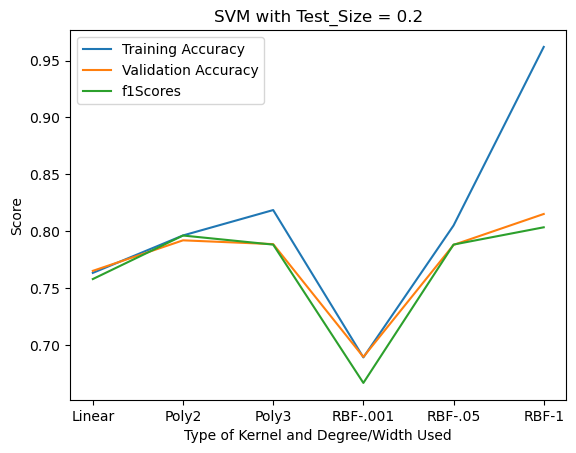

In [18]:
train_acc, val_acc, f1_scores = train_models(X, Y, svm_models, 0.2)
plt.title("SVM with Test_Size = 0.2")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()

### Training RF Models with test_size = 0.8

In [19]:
rf_splits = [1, 2, 4, 8, 12, 16, 20]

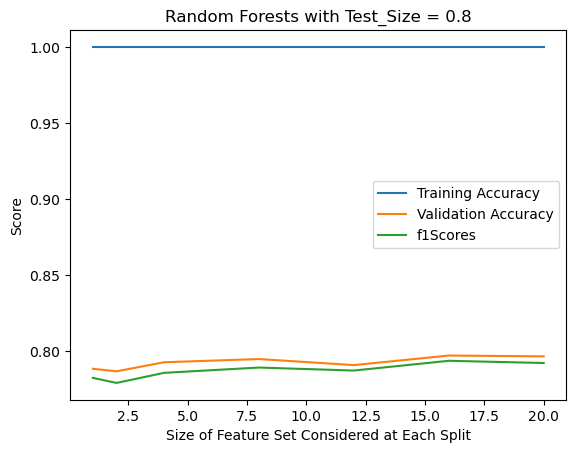

In [20]:
train_acc, val_acc, f1_scores = train_models(X, Y, rf_models, 0.8)
plt.title("Random Forests with Test_Size = 0.8")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()

### Training RF Models with test_size = 0.5

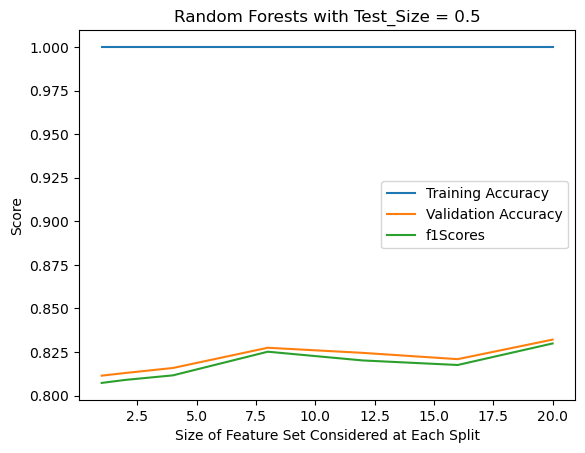

In [21]:
train_acc, val_acc, f1_scores = train_models(X, Y, rf_models, 0.5)
plt.title("Random Forests with Test_Size = 0.5")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()

### Training RF Models with test_size = 0.2

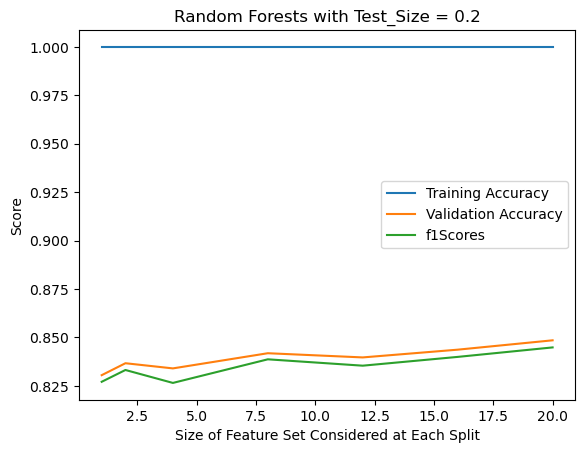

In [22]:
train_acc, val_acc, f1_scores = train_models(X, Y, rf_models, 0.2)
plt.title("Random Forests with Test_Size = 0.2")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()